In [1]:
import numpy as np
from math import*
import matplotlib.pyplot as plt

In [2]:
import urllib
outfilename = "donnees.csv"
url_of_file = "https://webstat.banque-france.fr/fr/downloadFile.do?id=5385691&exportType=csv" #lien pour télécharger les données de la banque de France sur les taux obligataires#
urllib.request.urlretrieve(url_of_file, outfilename) 

('donnees.csv', <http.client.HTTPMessage at 0x2ae0e9bdfa0>)

In [3]:
import datetime as dt
from datetime import date
import pandas as pd
df=pd.read_csv('donnees.csv',sep=";")
df.drop([0,1,2,3,4], axis=0, inplace=True) #pour supprimer les lignes inutiles
df.columns=['Date','Taux 10 ans','Taux 1 mois','Taux 1 an','Taux 2 ans', 'Taux 30 ans', 'Taux 3 mois', 'Taux 5 ans','Taux 6 mois', 'Taux 9 ans']
df.reindex(columns = ['Date','Taux 1 mois', 'Taux 3 mois', 'Taux 6 mois', 'Taux 1 an', 'Taux 2 ans','Taux 5 ans','Taux 9 ans','Taux 10 ans','Taux 30 ans'])
#df['Date'] = pd.to_datetime(df['Date'])
df

Date Taux 10 ans Taux 1 mois Taux 1 an Taux 2 ans Taux 30 ans  \
5      29/03/2023       2,819       2,536     3,036      2,713       3,207   
6      28/03/2023       2,811       2,524     3,053       2,69        3,19   
7      27/03/2023       2,748       2,615     3,041      2,615       3,121   
8      26/03/2023           -           -         -          -           -   
9      25/03/2023           -           -         -          -           -   
...           ...         ...         ...       ...        ...         ...   
13236  06/01/1987        9,18         NaN       NaN        NaN         NaN   
13237  05/01/1987        9,34         NaN       NaN        NaN         NaN   
13238  04/01/1987           -         NaN       NaN        NaN         NaN   
13239  03/01/1987           -         NaN       NaN        NaN         NaN   
13240  02/01/1987        9,16         NaN       NaN        NaN         NaN   

      Taux 3 mois Taux 5 ans Taux 6 mois Taux 9 ans  
5           2,797      2,646        2,98      2,973  
6           2,792      2,636       2,986      2,976  
7           2,814      2,572       2,961       2,96  
8               -          -           -          -  
9               -          -           -          -  
...           ...        ...         ...        ...  
13236         NaN        NaN         NaN        NaN  
13237         NaN        NaN         NaN        NaN  
13238         NaN        NaN         NaN        NaN  
13239         NaN        NaN         NaN        NaN  
13240         NaN        NaN         NaN        NaN  

[13236 rows x 10 columns]

In [18]:
from scipy import interpolate
v= ['Taux 1 mois', 'Taux 3 mois', 'Taux 6 mois', 'Taux 1 an', 'Taux 2 ans','Taux 5 ans','Taux 9 ans','Taux 10 ans','Taux 30 ans']
L=[]
F=[]
def remplace_virgule(n):
    for x in list(df[v[n]]):
        if x!="-":
            x=float(str(x).replace(",","."))
            L.append(x)
        else:
            L.append(x)
    df[v[n]]=L
    return df

remplace_virgule(8)
#Il faut exécuter remplace_virgule(0), remplace_virgule(1)....jusqu'à remplace_virgule(8)#
df=df.reindex(columns = ['Date','Taux 1 mois', 'Taux 3 mois', 'Taux 6 mois', 'Taux 1 an', 'Taux 2 ans','Taux 5 ans','Taux 9 ans','Taux 10 ans','Taux 30 ans'])
df

Date Taux 1 mois Taux 3 mois Taux 6 mois Taux 1 an Taux 2 ans  \
5      29/03/2023       2.536       2.797        2.98     3.036      2.713   
6      28/03/2023       2.524       2.792       2.986     3.053       2.69   
7      27/03/2023       2.615       2.814       2.961     3.041      2.615   
8      26/03/2023           -           -           -         -          -   
9      25/03/2023           -           -           -         -          -   
...           ...         ...         ...         ...       ...        ...   
13236  06/01/1987         NaN         NaN         NaN       NaN        NaN   
13237  05/01/1987         NaN         NaN         NaN       NaN        NaN   
13238  04/01/1987         NaN         NaN         NaN       NaN        NaN   
13239  03/01/1987         NaN         NaN         NaN       NaN        NaN   
13240  02/01/1987         NaN         NaN         NaN       NaN        NaN   

      Taux 5 ans Taux 9 ans Taux 10 ans Taux 30 ans  
5          2.646      2.973       2.819       3.207  
6          2.636      2.976       2.811        3.19  
7          2.572       2.96       2.748       3.121  
8              -          -           -           -  
9              -          -           -           -  
...          ...        ...         ...         ...  
13236        NaN        NaN        9.18         NaN  
13237        NaN        NaN        9.34         NaN  
13238        NaN        NaN           -         NaN  
13239        NaN        NaN           -         NaN  
13240        NaN        NaN        9.16         NaN  

[13236 rows x 10 columns]

In [133]:
def interpol_lin_taux(n,date):
    L=list(df[df['Date'] ==date].iloc[0,4::])
    if L==len(L)*['-'] or date not in list(df.Date):
        return ("Données indisponibles")
    else:
        y= np.interp([k for k in range(1,n+1)],[1,2,5,9,10,30],L)
        return y

Taux_nominaux=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux Nominaux estimés":interpol_lin_taux(30,'29/03/2023')})
Taux_nominaux

Maturité  Taux Nominaux estimés
0          1               3.036000
1          2               2.713000
2          3               2.690667
3          4               2.668333
4          5               2.646000
5          6               2.727750
6          7               2.809500
7          8               2.891250
8          9               2.973000
9         10               2.819000
10        11               2.838400
11        12               2.857800
12        13               2.877200
13        14               2.896600
14        15               2.916000
15        16               2.935400
16        17               2.954800
17        18               2.974200
18        19               2.993600
19        20               3.013000
20        21               3.032400
21        22               3.051800
22        23               3.071200
23        24               3.090600
24        25               3.110000
25        26               3.129400
26        27               3.148800
27        28               3.168200
28        29               3.187600
29        30               3.207000

In [134]:
plt.plot(interpol_lin_taux(50,'29/03/2023'))
plt.scatter([1,2,5,9,10,30],list(df[df['Date']=='29/03/2023'].iloc[0,4::]),color='orange')

Maturité  Taux zéro-coupon estimés
0          1                  0.030360
1          2                  0.027086
2          3                  0.026872
3          4                  0.026648
4          5                  0.026420
5          6                  0.027301
6          7                  0.028188
7          8                  0.029085
8          9                  0.029994
9         10                  0.028202
10        11                  0.028425
11        12                  0.028649
12        13                  0.028876
13        14                  0.029105
14        15                  0.029336
15        16                  0.029570
16        17                  0.029807
17        18                  0.030047
18        19                  0.030291
19        20                  0.030538
20        21                  0.030789
21        22                  0.031044
22        23                  0.031304
23        24                  0.031569
24        25                  0.031838
25        26                  0.032113
26        27                  0.032393
27        28                  0.032679
28        29                  0.032971
29        30                  0.033270

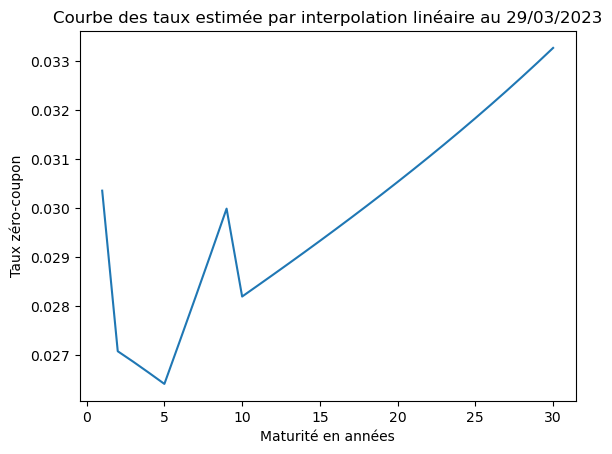

In [135]:
def courbe_taux_lin(n,date):
    i=interpol_lin_taux
    Z=[100/(100+i(n,date)[0])]+(n-1)*[0]
    for j in range(1,n):
        Z[j]=1/(100+i(n,date)[j])*(100-i(n,date)[j]*sum(Z))
    spot=[-1+(Z[k])**(-1/(k+1)) for k in range(len(Z))]
    plt.plot([k for k in range(1,n+1)],spot)
    plt.title('Courbe des taux estimée par interpolation linéaire au '+date)
    plt.xlabel('Maturité en années')
    plt.ylabel('Taux zéro-coupon')
    return spot

date_='29/03/2023'
Taux_spot=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux zéro-coupon estimés":courbe_taux_lin(30,date_)})
Taux_spot

In [136]:
from scipy import interpolate

def interpol_taux_nominaux_quad(n,date):
    L=list(df[df['Date'] ==date].iloc[0,4::])  #Taux 1 an et 2 ans#
    if L==len(L)*['-'] or date not in list(df.Date):
        return ('Données indisponibles. Jour férié ou week-end')
    else:
        f = interpolate.interp1d([1,2,5,9,10,30],L,kind="quadratic", fill_value="extrapolate")
        x=[k for k in range(1,n+1) ]
        L=f(x)
        return L

Taux_nominaux=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux Nominaux estimés":interpol_taux_nominaux_quad(30,'28/02/2023')})
Taux_nominaux

Maturité  Taux Nominaux estimés
0          1               3.272000
1          2               3.191000
2          3               3.121989
3          4               3.066085
4          5               3.030000
5          6               3.014853
6          7               3.020643
7          8               3.042611
8          9               3.076000
9         10               3.119000
10        11               3.160760
11        12               3.199472
12        13               3.235135
13        14               3.267750
14        15               3.297316
15        16               3.323834
16        17               3.347304
17        18               3.367725
18        19               3.385097
19        20               3.399422
20        21               3.410697
21        22               3.418925
22        23               3.424104
23        24               3.426234
24        25               3.425316
25        26               3.421350
26        27               3.414335
27        28               3.404272
28        29               3.391160
29        30               3.375000

In [118]:
plt.plot(interpol_taux_nominaux_quad(50,'29/03/2023'))
plt.scatter([1,2,5,9,10,30],list(df[df['Date']=='29/03/2023'].iloc[0,4::]),color='orange')

In [97]:
def courbe_taux_quad(n,date):
    if list(df[df['Date'] ==date].iloc[0,4:6:])==2*['-']:
        return('Données indisponibles. Jour férié ou week-end')
    else:
        i=interpol_taux_nominaux_quad
        Z=[100/(100+i(n,date)[0])]+(n-1)*[0]
        for j in range(1,n):
            Z[j]=1/(100+i(n,date)[j])*(100-i(n,date)[j]*sum(Z))
        spot=[-1+(Z[k])**(-1/(k+1)) for k in range(len(Z))]
        plt.plot([k for k in range(1,n+1)],spot)
        plt.title('Courbe des taux estimée par la méthode quadratique au '+date)
        plt.xlabel('Maturité en années')
        plt.ylabel('Taux zéro-coupon')
        plt.show
        return spot

date_='29/03/2023'
Taux_spot=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux zéro-coupon estimés":courbe_taux_quad(30,date_)})
Taux_spot


Maturité  Taux zéro-coupon estimés
0          1                  0.030360
1          2                  0.027086
2          3                  0.025591
3          4                  0.025725
4          5                  0.026461
5          6                  0.027638
6          7                  0.029276
7          8                  0.030394
8          9                  0.029954
9         10                  0.028168
10        11                  0.026398
11        12                  0.024859
12        13                  0.023545
13        14                  0.022448
14        15                  0.021563
15        16                  0.020888
16        17                  0.020419
17        18                  0.020156
18        19                  0.020102
19        20                  0.020259
20        21                  0.020634
21        22                  0.021235
22        23                  0.022077
23        24                  0.023177
24        25                  0.024562
25        26                  0.026267
26        27                  0.028341
27        28                  0.030856
28        29                  0.033917
29        30                  0.037684

In [108]:
from scipy import interpolate

def interpol_taux_nominaux_cub(n,date):
    L=list(df[df['Date'] ==date].iloc[0,4::])  #Taux 1 an et 2 ans#
    if L==len(L)*['-']:
        return ('Données indisponibles. Jour férié ou week-end')
    else:
        f = interpolate.interp1d([1,2,5,9,10,30],L,kind="cubic", fill_value="extrapolate")
        x=[k for k in range(1,n+1) ]
        L=f(x)
        return L

Taux_nominaux=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux Nominaux estimés":interpol_taux_nominaux_cub(30,'29/03/2023')})
Taux_nominaux

Maturité  Taux Nominaux estimés
0          1               3.036000
1          2               2.713000
2          3               2.569421
3          4               2.561632
4          5               2.646000
5          6               2.777965
6          7               2.909254
7          8               2.990666
8          9               2.973000
9         10               2.819000
10        11               2.539193
11        12               2.156049
12        13               1.692043
13        14               1.169644
14        15               0.611325
15        16               0.039558
16        17              -0.523186
17        18              -1.054433
18        19              -1.531714
19        20              -1.932555
20        21              -2.234485
21        22              -2.415032
22        23              -2.451725
23        24              -2.322090
24        25              -2.003657
25        26              -1.473954
26        27              -0.710509
27        28               0.309151
28        29               1.607497
29        30               3.207000

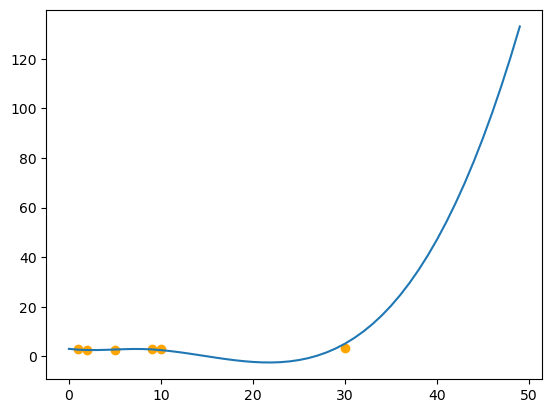

In [119]:
plt.plot(interpol_taux_nominaux_cub(50,'29/03/2023'))
plt.scatter([1,2,5,9,10,30],list(df[df['Date']=='29/03/2023'].iloc[0,4::]),color='orange')

Maturité  Taux zéro-coupon estimés
0          1                  0.030360
1          2                  0.027086
2          3                  0.025630
3          4                  0.025565
4          5                  0.026463
5          6                  0.027878
6          7                  0.029302
7          8                  0.030188
8          9                  0.029955
9         10                  0.028170
10        11                  0.024997
11        12                  0.020789
12        13                  0.015907
13        14                  0.010688
14        15                  0.005423
15        16                  0.000341
16        17                 -0.004383
17        18                 -0.008617
18        19                 -0.012264
19        20                 -0.015244
20        21                 -0.017480
21        22                 -0.018886
22        23                 -0.019353
23        24                 -0.018725
24        25                 -0.016761
25        26                 -0.013064
26        27                 -0.006884
27        28                  0.003454
28        29                  0.023268
29        30                  0.126597

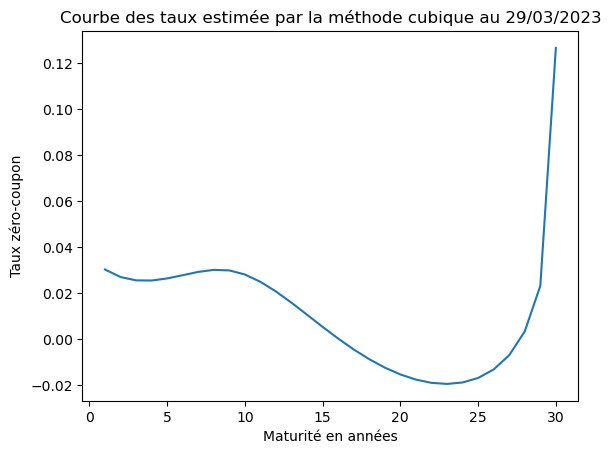

In [107]:
def courbe_taux_cub(n,date):
    if list(df[df['Date'] ==date].iloc[0,4:6:])==2*['-']:
        return('Données indisponibles. Jour férié ou week-end')
    else:
        i=interpol_taux_nominaux_cub
        Z=[100/(100+i(n,date)[0])]+(n-1)*[0]
        for j in range(1,n):
            Z[j]=1/(100+i(n,date)[j])*(100-i(n,date)[j]*sum(Z))
        spot=[-1+(Z[k])**(-1/(k+1)) for k in range(len(Z))]
        plt.plot([k for k in range(1,n+1)],spot)
        plt.title('Courbe des taux estimée par la méthode cubique au '+date)
        plt.xlabel('Maturité en années')
        plt.ylabel('Taux zéro-coupon')
        plt.show
        return spot

date_='29/03/2023'
Taux_spot=pd.DataFrame({"Maturité":[k for k in range(1,31)],"Taux zéro-coupon estimés":courbe_taux_cub(30,date_)})
Taux_spot
